# Outros métodos de IA e suas aplicações

---

### **Objetivo:**
No algoritmo a ser desenvolvido, pretende-se utilizar técnicas de **Lógica Fuzzy** (IA Clássica) para determinar (de 0 à 10) quão custo-benefico é um veiculo. Para tal, considera-se o seguinte cenário:

#### Input:
- Valor: Qual o preço do veículo, em reais? De 0 - 100 (universo/range da variável crisp), escala em milhares (10ˆ3). Ex. 17.4 = R$17.400 mil. "Acessível", "Neutro", "Caro" (Conjunto Fuzzy). 

- Eficiência: Quantos quilômetros o veículo consegue rodar consumindo a menor quantidade de gasolina? Escala de 0 à 10 (universo), onde quanto maior a escala de eficiência, maior é a quilometragem rodada ao custo de um menor consumo de gasolina. "Fraca", "Moderada", "Potente" (Conjunto Fuzzy)

#### Output:
- Custo-benefício: Qual a relação da eficiência X valor do veiculo, de 0 à 10? (universo). 'Ruim', 'Ok', 'Bom'. (Conjunto Fuzzy)

#### Regras:
- Se o veiculo tiver um preço 'acessível' E uma eficiência 'potente', logo o custo beneficio é 'bom'.

- Se o veiculo tiver um preço 'neutro' E uma eficiência 'moderada', o custo beneficio dele é 'ok'.

- Se o veiculo tiver um preço 'caro' OU eficiência 'fraca', o custo beneficio dele é 'ruim'. 

# **Carregando as bibliotecas**

In [54]:
!pip install -U scikit-fuzzy

import numpy as np
import skfuzzy as fz
from skfuzzy import control as ctrl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Lógica Clássica**

In [55]:
# Função que retorna o custo beneficio, dado a entrada dos argumentos 'valor' e 'eficiencia'. 
def custo_beneficio(valor, eficiencia):
  input1 = { # Valor
      "Acessivel": 33.33,
      "Neutro": 67,
      "Caro":  100
  }
  
  input2 = { # Eficiência
      "Fraca": 4,
      "Moderada": 7,
      "Potente": 10 
  }

  output = { # Custo-beneficio
      'Ruim': 4,
      'Ok': 7,
      'Bom': 10
  }

  rating = ''
  if (valor <= input1['Acessivel']) and (eficiencia > input2['Moderada']): # Se o veículo tiver um preço 'acessível' e uma eficiência 'potente', logo o custo beneficio é 'bom'.
    rating = 'Bom'

  elif (valor <= input1['Neutro']) and (eficiencia >= input2['Moderada']): # Se o veículo tiver um preço 'neutro' e uma eficiência 'moderada', o custo beneficio dele é 'ok'.
    rating = 'Ok'
  
  elif (valor > input1['Neutro']) or (eficiencia < input2['Fraca']): # Se o veículo tiver um preço 'caro' OU eficiência 'fraca', o custo beneficio dele é 'ruim'. 
    rating = 'Ruim'

  return(output[rating])

In [56]:
# Testes:
print('Cenário 1) Custo beneficio: ', custo_beneficio(80, 3)) # Alto valor, pouca eficiência.
print('Cenário 2) Custo beneficio: ', custo_beneficio(30, 8)) # Baixo valor, alta eficiência.
print('Cenário 3) Custo beneficio: ', custo_beneficio(50.5, 9)) # Valor médio, alta eficiência.
print('Cenário 4) Custo beneficio: ', custo_beneficio(95, 2)) # Alto valor, baixa eficiência.

# O output é limitado a valores pré-determinados, e as regras são limitadas; não comporta todos os cenários de input. 
# Ex.: Caso o valor do veiculo seja 'neutro' (valor <= input1['Neutro']) e a eficiencia 'moderada' (eficiencia <= input2['Moderada']), o algoritmo não sabe tratar esse cenário. 

# print('Cenário 5 - Improvável) Custo beneficio: ', custo_beneficio(60, 5)) # Valor médio, eficiência média.

Cenário 1) Custo beneficio:  4
Cenário 2) Custo beneficio:  10
Cenário 3) Custo beneficio:  7
Cenário 4) Custo beneficio:  4


# **Lógica Fuzzy**

In [57]:
valor = ctrl.Antecedent(np.arange(0, 101, 1), 'valor') # Qual o preço do veículo, em reais? De 0 - 100.
eficiencia = ctrl.Antecedent(np.arange(0, 11, 1), 'eficiencia') # Quantos quilometros o veículo consegue rodar consumindo a menor quantidade de gasolina? Escala de 0 à 10.
custo_beneficio = ctrl.Consequent(np.arange(0, 11, 1), 'custo_beneficio') # Qual a relação da eficiência X valor do veiculo, de 0 à 10?.

In [58]:
# Universo de valores CRISP:
print('Valor: ', valor.universe)
print('\nEficiencia: ', eficiencia.universe)
print('\nCusto Beneficio: ', custo_beneficio.universe)

Valor:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]

Eficiencia:  [ 0  1  2  3  4  5  6  7  8  9 10]

Custo Beneficio:  [ 0  1  2  3  4  5  6  7  8  9 10]


In [59]:
# Mapeando os valores semânticos das variáveis difusas (valor e eficiência)
valor.automf(names = ['Acessivel', 'Neutro', 'Caro']) # Valor: "Acessível", "Neutro", "Caro" (Conjunto Fuzzy). 
eficiencia.automf(names = ['Fraca', 'Moderada', 'Potente']) # Eficiência: "Fraca", "Moderada", "Potente" (Conjunto Fuzzy)

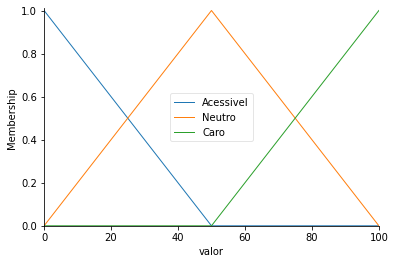

In [60]:
# Visualização de uma função triângular, à partir dos grupos semânticos da entrada 'valor'
valor.view()

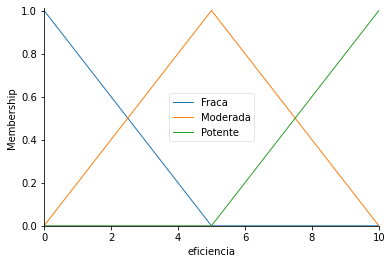

In [61]:
# Visualização de uma função triângular, à partir dos grupos semânticos da entrada 'eficiencia'
eficiencia.view()

In [62]:
# Definindo a função de associação (pertinência) triângular através do mapeamento dos valores Fuzzy do universo da saida 'custo_beneficio'. 
# 'Ruim', 'Ok', 'Bom' (Conjunto Fuzzy)
custo_beneficio['Ruim'] = fz.trimf(custo_beneficio.universe, [0, 0, 4])
custo_beneficio['Ok'] = fz.trimf(custo_beneficio.universe, [0, 4, 10])
custo_beneficio['Bom'] = fz.trimf(custo_beneficio.universe, [4, 10, 10])

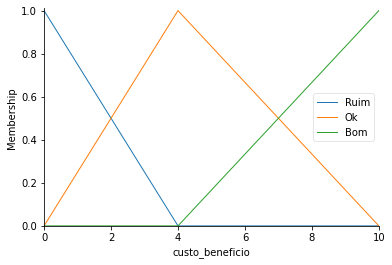

In [63]:
# Visualização de uma função triângular, à partir dos grupos semânticos da saida 'custo_beneficio'
custo_beneficio.view()

In [64]:
# Cria-se as regras do sistema: à partir dos antecedentes (valor e eficiência) gerá-se a consequência (custo beneficio).
# Em alguns cenários, há-se sobreposição (difusão tanto da entrada, quanto da saida).  
rule1 = ctrl.Rule(valor['Acessivel'] & eficiencia['Potente'], custo_beneficio['Bom']) # Se o veiculo tiver um preço 'acessível' E uma eficiência 'potente', logo o custo beneficio é 'bom'.
rule2 = ctrl.Rule(valor['Neutro'] & eficiencia['Moderada'], custo_beneficio['Ok']) # Se o veiculo tiver um preço 'neutro' E uma eficiência 'moderada', o custo beneficio dele é 'ok'.
rule3 = ctrl.Rule(valor['Caro'] | eficiencia['Fraca'], custo_beneficio['Ruim']) # Se o veiculo tiver um preço 'caro' OU eficiência 'fraca', o custo beneficio dele é 'ruim'. 

In [65]:
# Gera-se o sistema com base nas regras definidas.
ctrl_custo_beneficio = ctrl.ControlSystem([rule1, rule2, rule3])

# Instância um novo controlador com o sistema gerado anteriormente.
controller = ctrl.ControlSystemSimulation(ctrl_custo_beneficio)

## Aplicando o sistema

### Exemplo 1:

In [66]:
# Cenário: valor 'neutro' e eficiência 'potente'.
# Expectativa: custo-beneficio 'ok'.

controller.input['valor'] = 40.2 # Valor do veiculo: R$40.200
controller.input['eficiencia'] = 9.6 # Eficiência: 9.6/10

controller.compute() # Calcula o resultado. 

output = controller.output['custo_beneficio'] # Armazena em o resultado em uma váriavel. 

print('Custo beneficio: ', round(output, 2))

Custo beneficio:  6.06


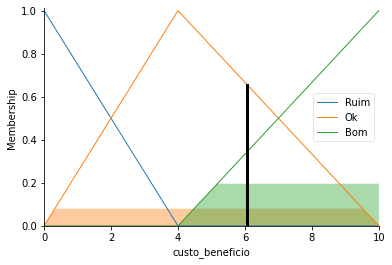

In [67]:
# Exibe a os grupos semânticos do output (custo_beneficio) e pinta a pertinência do resultado por via da exibição de uma função triangular.
custo_beneficio.view(sim=controller)

### Exemplo 2:

In [68]:
# Cenário: valor 'caro' e eficiência 'fraca'.
# Expectativa: custo-beneficio 'ruim'.

controller.input['valor'] = 85.3 # Valor do veiculo: R$85.300
controller.input['eficiencia'] = 3.5 # Eficiência: 3.5/10

controller.compute() # Calcula o resultado. 

output = controller.output['custo_beneficio'] # Armazena em o resultado em uma váriavel. 

print('Custo beneficio: ', round(output, 2))

Custo beneficio:  3.74


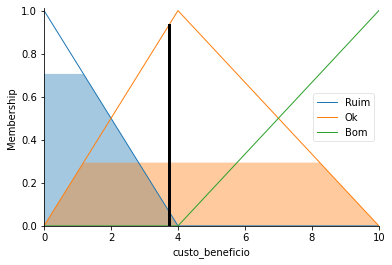

In [69]:
# Exibe a os grupos semânticos do output (custo_beneficio) e pinta a pertinência do resultado por via da exibição de uma função triangular.
custo_beneficio.view(sim=controller)

### Exemplo 3:

In [70]:
# Cenário: valor 'acessivel' e eficiência 'potente'.
# Expectativa: custo-beneficio 'bom'.

controller.input['valor'] = 20.0 # Valor do veiculo: R$20.000
controller.input['eficiencia'] = 9.9 # Eficiência: 9.9/10

controller.compute() # Calcula o resultado. 

output = controller.output['custo_beneficio'] # Armazena em o resultado em uma váriavel. 

print('Custo beneficio: ', round(output, 2))

Custo beneficio:  7.58


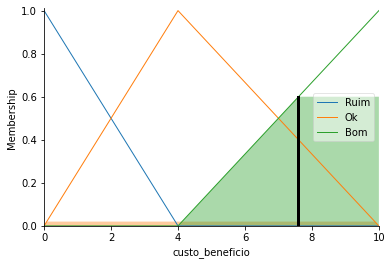

In [71]:
# Exibe a os grupos semânticos do output (custo_beneficio) e pinta a pertinência do resultado por via da exibição de uma função triangular.
custo_beneficio.view(sim=controller)

# **Conclusão e considerações finais**

Diante do exposto, o algoritmo da Lógica Fuzzy consegue obter uma gama maior de resultados, e sobrepujar, também, as limitações de regras da Lógica Clássica. Como consequência, gera-se um resultado (output) mais satisfatório para N valores de entrada (input).  